# Exploratory Data Analysis 

This file is composed of components of the EDA process for preliminary exploration of your data. This code is not a complete EDA, but rather a preliminary examination of data. Please see the Table of Contents to explore different areas of EDA.
***

##### **Input:** .csv file with entire dataset. Will need to interpolate prior to using unsupervised learning if NaN exist in your dataset
##### **Output:** Figures for EDA
##### **Dependencies:** 
***

##### Format of input: 
.csv file with entire dataset 
***

**Check:** 
* Will need to interpolate data/remove NaN before doing any unsupervised learning for EDA

**Sources:**

***
***

## Table of Contents

#### Exploratory Data Analysis
* [Cleaning and Filtering Data](#read)
* [Correlation Plots](#corr)
* [Covariance Matrix](#cov)
* [Missing Data Analysis](#miss)
* [Outlier Analysis](#out)
* [Histograms of Features](#hist)

#### Unsupervised Learning
* [Clustering](#cluster)
    * [KNN Clustering](#knn)
    * [Hierarchical Clustering](#hic)
* [Principal Component Analysis (PCA)](#pca)


***

## Read data:
<a id="read"></a>

In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv(filename)  #Change filename

NameError: name 'filename' is not defined

## Preliminary Exploratory Data Analysis:

https://github.com/dformoso/sklearn-classification/blob/master/Data%20Science%20Workbook%20-%20Census%20Income%20Dataset.ipynb

In [ ]:
len(data)

238595

In [ ]:
data.describe()

,ECG,Apple Watch,Empatica,Garmin,Fitbit,Miband,Biovotion,Skin Tone
count,221475.000000,12791.000000,138252.000000,36625.000000,10861.000000,20632.000000,160841.000000,238595.000000
mean,90.549726,89.579235,88.962121,84.418212,84.253384,86.713794,86.938579,3.638509
std,20.568018,17.021518,15.873166,15.430226,16.898867,14.536440,16.982374,1.669205
min,24.174000,36.000000,48.200000,39.000000,46.000000,45.000000,45.000000,1.000000
25%,76.355000,78.000000,77.630000,73.000000,70.000000,74.000000,75.000000,2.000000
50%,89.291000,89.000000,87.430000,84.000000,81.000000,87.000000,86.000000,4.000000
75%,101.030000,100.000000,99.120000,96.000000,95.000000,98.000000,98.000000,5.000000
max,240.000000,155.000000,178.740000,134.000000,180.000000,128.000000,168.000000,6.000000


### Correlation Plots
<a id="corr" ></a>


In [ ]:
%matplotlib inline

<AxesSubplot:>

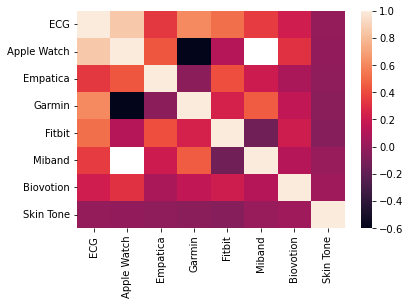

In [ ]:
import seaborn as sns
corr = data.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

<AxesSubplot:>

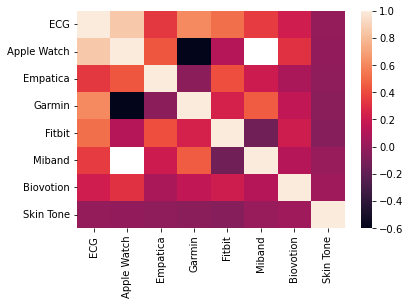

In [ ]:
#Correlation Plot
corr = data.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

## Covariance Matrix
<a id="cov"></a>

Compute pairwise covariance of columns

Covariance is a measure of how much two random variables vary together. It’s similar to variance, but where variance tells you how a single variable varies, co variance tells you how two variables vary together.
*Covariance must be scaled.*

- Python: https://www.geeksforgeeks.org/python-pandas-dataframe-cov/
- Math/Interpretation: https://www.statisticshowto.datasciencecentral.com/covariance/

In [1]:
#Need to standardize scale:
cv_df = data.drop(columns=[]) #drop all columns that are non-numeric
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
cv_np = sc.fit_transform(cv_df)
cv_df = pd.DataFrame(cv_np)
#cv_df.columns = [] #name columns if desired

#covariance 
cv_df.cov()

NameError: name 'data' is not defined

## Check for missing values
<a id="miss"></a>
#### Very cool package for missing values (includes heatmaps of missing, bar graphs, and matrices of missing values):
https://github.com/ResidentMario/missingno

In [13]:
import missingno as msno

#Check for missing data
msno.matrix(data)

ModuleNotFoundError: No module named 'missingno'

## Plot Distribution of Each Feature
<a id="dist"></a>

### Outcome variable 

To look at how the outcome variable is balanced:

In [12]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,1)) 
sns.countplot(y=outcomevariablehere, data=data); #put outcomevariable here

NameError: name 'outcomevariablehere' is not defined

<Figure size 1440x72 with 0 Axes>

### Plot distributions by outcome class 
<a id="dist-class"></a>

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort dataframe by outcome

#Plot outcome variables
sns.distplot(outcome_a[[X1]], hist=False, rug=True)
sns.distplot(outcome_b[[X1]], hist=False, rug=True)
sns.distplot(outcome_c[[X1]], hist=False, rug=True)

plt.title()
plt.xlabel()
plt.legend(labels=[])

NameError: name 'outcome_a' is not defined

Plot all variables at once:

### Outlier Analysis
<a id="out"></a>

In [ ]:
sns.boxplot(y=variablehere, x=variablehere, data=data, palette="Set1")

## Plot histograms of all variables in data

In [40]:
def makehist(datainput, label, color):
    fig = plt.figure(figsize=(16,4))
    mean = datainput.mean(axis = 0) #changeoutcomevar
    plt.hist(datainput, bins=(20), align='mid', color=color, alpha=0.5)
    plt.axvline(x=mean, color=color, linestyle='-')
    plt.xlabel(label)
    plt.ylabel('Frequency')
    plt.title((label + ' Histogram'))
    plt.tight_layout()
    plt.savefig((filesource + label + '.png'), dpi=100) #change filesource or add as input to function if variable
    print(('Saved plot of ' + label))

Saved plot of Mean


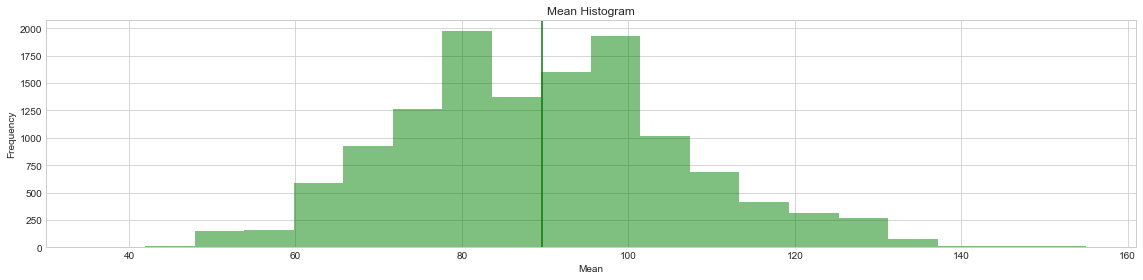

In [41]:
makehist(data['Variable'], 'Variable', 'green')
#Repeat above command for each numeric Variable in data

## Plot boxplot of all variables in data

In [117]:
def makeboxplot(datainput, label):
    fig = plt.figure(figsize =(16, 4))
    plt.boxplot(datainput)
    plt.title((label + ' Box Plot'))
    plt.savefig((filesource + label + '.png'), dpi=100) #change filesource or add as input to function if variable
    print(('Saved plot of ' + label))

Saved plot of Mean


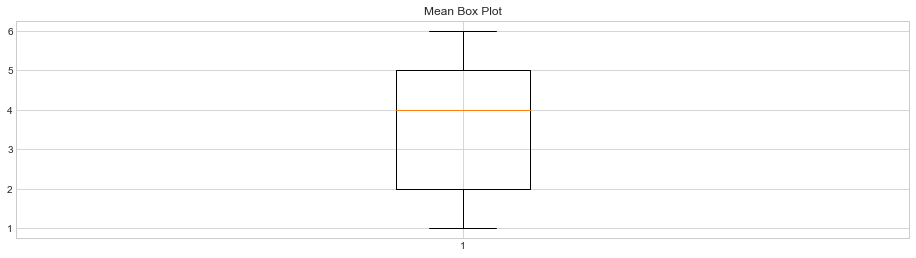

In [118]:
makeboxplot(data['Variable'], 'Variable')
#Repeat above command for each numeric Variable in data

## Plot leafplot of all variables in data

In [4]:
def makeleafplot(datainput, label):
    fig = plt.figure(figsize =(16, 4))
    plt.stem(datainput)
    plt.title((label + ' Leaf Plot'))
    plt.savefig((filesource + label + '.png'), dpi=100) #change filesource or add as input to function if variable
    print(('Saved plot of ' + label))

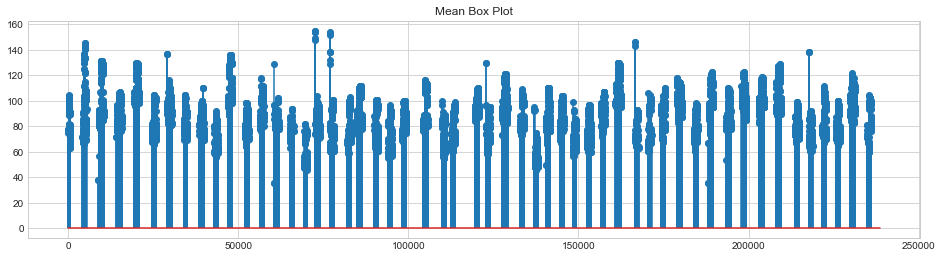

In [116]:
makeleafplot(data['Variable'], 'Variable')
#Repeat above command for each numeric Variable in data

# Unsupervised Learning Section- 

## Clustering
<a id="cluster"></a>

https://www.neuroelectrics.com/blog/clustering-methods-in-exploratory-analysis/

In [ ]:
dfc = data.drop(columns=[]) # drop all non-numeric columns
dfc.head()

### KNN Clustering:
<a id="knn"></a>

In [ ]:
from sklearn.cluster import KMeans
# create kmeans object
kmeans = KMeans(n_clusters=3)# fit kmeans object to data
kmeans.fit(dfc)# print location of clusters learned by kmeans object
#print(kmeans.cluster_centers_)# save new clusters for chart
y_km = kmeans.fit_predict(dfc)

In [ ]:
labels = kmeans.labels_
dfc['clusters'] = labels

### Hierarchical Clustering
<a id="hic"></a>

*Agglomerative (data points are clustered using a bottim-up approach starting with individual data points)


https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/

In [ ]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.title("Data Dendograms")
dend = shc.dendrogram(shc.linkage(dfc, method='ward'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(dfc)

In [ ]:
print(cluster.labels_)

## PCA (Prinicipal Component Analysis)
<a id="pca"></a>
https://cmdlinetips.com/2018/03/pca-example-in-python-with-scikit-learn/

https://scikit-learn.org/stable/tutorial/statistical_inference/unsupervised_learning.html

PCA selects the successive components that explain the maximum variance in the signal.
This is useful to us because we have a large amount of features. 

In [ ]:
# Need to scale prior to doing PCA

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sdfc = sc.fit_transform(dfc)

In [ ]:
from sklearn import decomposition
pca = decomposition.PCA()
pca.fit(sdfc)

In [ ]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)  

In [ ]:
pca.n_components = 9
pc = pca.fit(dfc)

result=pd.DataFrame(pca.transform(dfc), columns=['PCA%i' % i for i in range(9)], index=dfc.index)


In [ ]:
pcft = pca.fit_transform(dfc)

pc_df = pd.DataFrame(data=pcft, columns= ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'])

#Example below:
#pc_df['Cluster'] = data['Definition']
#pc_df['Status'] = data['Status']
#pc_df['Gender'] = data['Gender']
pc_df.head()

In [ ]:
%matplotlib inline

import seaborn as sns
dfvar = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC1','PC2','PC3','PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9']})
sns.barplot(x='PC',y="var", 
           data=dfvar, color="c");


Install matplotlib widget Ipython magic: https://github.com/matplotlib/jupyter-matplotlib

Problems with matplotlib widget not working: https://github.com/matplotlib/jupyter-matplotlib/issues/66

In [ ]:
%matplotlib widget 

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D #<-- Note the capitalization! 


pc_df[insertvarhere]=pd.Categorical(pc_df[insertvarhere]) #need to change insertvarhere
my_color=pc_df[insertvarhere].cat.codes                   #need to change insertvarhere

# Plot initialisation
fig = plt.figure()
ax = Axes3D(fig) 
ax.scatter(result['PCA0'], result['PCA1'], result['PCA2'], c=my_color, cmap='Accent', s=60)

#make simple, bare axis lines through space:
xAxisLine = ((min(result['PCA0']), max(result['PCA0'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(result['PCA1']), max(result['PCA1'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(result['PCA2']), max(result['PCA2'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
 
# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA")
#ax.legend()
plt.show()


In [ ]:
sns.lmplot( x="PC1", y="PC5",
  data=pc_df, 
  fit_reg=False, 
  hue=Variable, # color by change variable here
  legend=True,
  scatter_kws={"s": 80,'alpha':0.3}) # specify the point size